# 1. Long Short Term Memory (LSTM) Model Building

### 1.1 Import needed packages

In [1]:
#import packages
import pandas as pd
import numpy as np

#import required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
 
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline


#set figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

 
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

### 1.2 Obtain stock price from API

In [2]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
ts = TimeSeries(key='GNBFRSBBEB443IAM', output_format='pandas')
df, meta_data = ts.get_intraday(symbol='AAPL',interval='30min', outputsize='full')
df = df[::-1]
df

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-08-20 20:00:00,475.8799,476.8800,475.8300,476.5500,85002.0
2020-08-20 19:30:00,475.8500,475.9500,475.8100,475.8200,18118.0
2020-08-20 19:00:00,475.5000,475.8900,475.4000,475.8900,29011.0
2020-08-20 18:30:00,475.6000,475.9700,475.2500,475.5000,45366.0
2020-08-20 18:00:00,474.9000,476.0000,474.6100,475.6900,65244.0
2020-08-20 17:30:00,474.5500,475.0000,462.8300,474.9800,62253.0
2020-08-20 17:00:00,473.6900,474.7400,462.8300,474.5200,95989.0
2020-08-20 16:30:00,473.1000,473.7000,469.1400,473.7000,543806.0
2020-08-20 16:00:00,471.8500,473.5680,471.4900,472.8300,4027542.0


### 1.3 Data preprocessing

In [3]:
#creat dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data.index[i]
    new_data['Close'][i] = data['4. close'][i]

#set index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creat train and test sets
dataset = new_data.values

train = dataset[0:750,:]
valid = dataset[750:,:]


#convert dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

### 1.4 LSTM model training

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

# 2. Simulate Trading & Evaluation

### 2.1 Prediction

In [ ]:
#predicting future stock price (use past 60 data to predict next one data)
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

### 2.2 Simulate trading
### We compare the predicting close price of  yesterday, today, and tomorrow when making trading decision. If the predicting close price of today greater than the one of yesterday, and the one of tomorrow also greater than the one of today, we would choose to buy or to keep holding the stock. If we find that predicting close price of today less than the one of yesterday, or the one of tomorrow less than the one of today, we would choose to sell out the stock or not to buy the stock.

In [56]:
trading = [] #include 4 kinds of action, there are "All in", "All out", "Keep the stock", "No action"
hold_stock = [] #describe how much money we use to buy the stock, "1" means we have spent all of our money, "0" means we haven't spent
train = new_data[:750]
valid = new_data[750:]
valid['Predictions'] = closing_price

#Record trading decision
if valid['Predictions'][0] > train['Close'][len(train['Close'])-1]:
    trading.append('All in')
    hold_stock.append(1)
else:
    trading.append('No action')
    hold_stock.append(0)
    
for i in range(1,len(closing_price)):
    if i+1 < len(closing_price):
        if valid['Predictions'][i] > valid['Predictions'][i-1] and valid['Predictions'][i+1] >= valid['Predictions'][i] and hold_stock[i-1] == 0:
            trading.append('All in')
            hold_stock.append(1)
        elif valid['Predictions'][i] > valid['Predictions'][i-1] and valid['Predictions'][i+1] < valid['Predictions'][i] and hold_stock[i-1] == 0:
            trading.append('No action')
            hold_stock.append(0)
        elif valid['Predictions'][i] < valid['Predictions'][i-1] and hold_stock[i-1] == 1:
            trading.append('All out')
            hold_stock.append(0)
        elif valid['Predictions'][i] >= valid['Predictions'][i-1] and valid['Predictions'][i+1] >= valid['Predictions'][i] and hold_stock[i-1] == 1:
            trading.append('Keep the stock')
            hold_stock.append(1)
        elif valid['Predictions'][i] >= valid['Predictions'][i-1] and valid['Predictions'][i+1] < valid['Predictions'][i] and hold_stock[i-1] == 1:
            trading.append('All out')
            hold_stock.append(0)
        elif valid['Predictions'][i] <= valid['Predictions'][i-1] and hold_stock[i-1] == 0:
            trading.append('No action')
            hold_stock.append(0)
    else:
        if valid['Predictions'][i] > valid['Predictions'][i-1] and hold_stock[i-1] == 0:
            trading.append('All in')
            hold_stock.append(1)
        elif valid['Predictions'][i] < valid['Predictions'][i-1] and hold_stock[i-1] == 1:
            trading.append('All out')
            hold_stock.append(0)
        elif valid['Predictions'][i] >= valid['Predictions'][i-1] and hold_stock[i-1] == 1:
            trading.append('Keep the stock')
            hold_stock.append(1)
        elif valid['Predictions'][i] <= valid['Predictions'][i-1] and hold_stock[i-1] == 0:
            trading.append('No action')
            hold_stock.append(0)

#check trade decision        
trading

C:\Users\30282\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


['No action',
 'No action',
 'No action',
 'No action',
 'No action',
 'No action',
 'No action',
 'No action',
 'No action',
 'No action',
 'No action',
 'No action',
 'No action',
 'No action',
 'No action',
 'No action',
 'No action',
 'No action',
 'All in',
 'Keep the stock',
 'Keep the stock',
 'Keep the stock',
 'Keep the stock',
 'Keep the stock',
 'Keep the stock',
 'Keep the stock',
 'Keep the stock',
 'Keep the stock',
 'Keep the stock',
 'Keep the stock',
 'Keep the stock',
 'Keep the stock',
 'Keep the stock',
 'Keep the stock',
 'Keep the stock',
 'Keep the stock',
 'Keep the stock',
 'Keep the stock',
 'Keep the stock',
 'Keep the stock',
 'Keep the stock',
 'Keep the stock',
 'Keep the stock',
 'Keep the stock',
 'Keep the stock',
 'Keep the stock',
 'All out',
 'No action',
 'No action',
 'No action',
 'No action',
 'No action',
 'No action',
 'No action',
 'All in',
 'Keep the stock',
 'Keep the stock',
 'Keep the stock',
 'Keep the stock',
 'Keep the stock',
 'Keep t

In [57]:
#calculate balance
original_balance = 50000 #suppose we have 50,000 dollars at the beginning 
balance_record = [original_balance]

if hold_stock[0] == 1:
    balance_record.append(original_balance*(valid['Close'][0]/train['Close'][len(train['Close'])-1]))
else:
    balance_record.append(original_balance)

for i in range(1,len(hold_stock)):
    if hold_stock[i] == 1:
        balance_record.append(balance_record[i]*(valid['Close'][i]/valid['Close'][i-1]))
    else:
        balance_record.append(balance_record[i])
        
#check balance record
balance_record

[50000,
 50000,
 50000,
 50000,
 50000,
 50000,
 50000,
 50000,
 50000,
 50000,
 50000,
 50000,
 50000,
 50000,
 50000,
 50000,
 50000,
 50000,
 50000,
 50053.149383693315,
 50005.654189754605,
 50003.39251385276,
 49977.38324098156,
 50036.18681442949,
 50014.70089336197,
 50039.57932828225,
 50118.73798484676,
 50005.6541897546,
 49954.766481963125,
 50353.386859663,
 50362.99898224584,
 50558.633947755276,
 50725.997964491675,
 50834.558407780154,
 51139.884654529,
 50981.56734139997,
 50807.42960533755,
 51207.169512608845,
 51093.52029854122,
 51035.282144068755,
 51081.08108108108,
 51141.01549247993,
 51111.61370575597,
 51113.87538165781,
 51094.65113649214,
 51034.71672509329,
 51074.29605337555,
 51074.29605337555,
 51074.29605337555,
 51074.29605337555,
 51074.29605337555,
 51074.29605337555,
 51074.29605337555,
 51074.29605337555,
 51074.29605337555,
 51016.98370109668,
 51076.54359660216,
 51103.514115321625,
 51159.21947419346,
 51377.714388969536,
 51441.76937092827,
 51

### 2.3 Evaluation

#### 2.3.1 RMSE (root mean square error)
#### RMSE is 3.526855, which is quite good in time series prediction since it is so close to 0

In [66]:
rmse=np.sqrt(np.mean(np.power((new_data[750:]-closing_price),2)))
rmse

Close    3.526855
dtype: float64

#### 2.3.2 Visualization
#### Red line represents prediction, blue line represents real stock price, and green line represents our balance(which is divided by 100).
#### Our prediction roughly match the real stock price, but doesn't sensitive enough. That is to say when stock price meets a turning point, our model can't predict it in time. The graph shows that the prediction of turning points would delay for one to two time units. That's why our balance sometimes would lose in graph. As a conclusion, the LSTM model works well on predicting short term trend, but has some delays on predicting turning points.  

C:\Users\30282\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


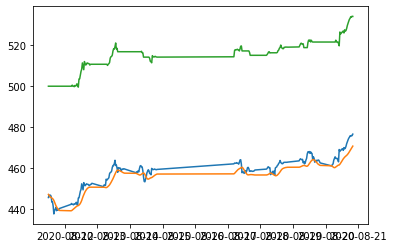

In [54]:
#Visualization
valid['Balance'] = np.dot(balance_record[0:len(balance_record)-1], 0.01)
plt.plot(valid[['Close','Predictions','Balance']])